In [1]:
import numpy as np
import pandas as pd

In [2]:
!ls nature*.xlsx

nature24473_MOESM4_neoantigens.xlsx nature24473_MOESM5_survival.xlsx


In [4]:
cohort_names = [
    "VanAllen",
    "Snyder",
    "Rizvi",
]

In [5]:

survival_dataframes = []
for s in cohort_names:
    print("Loading survival data for %s..." % (s,))
    df = pd.read_excel("nature24473_MOESM5_survival.xlsx", sheet_name="Survival %s et al." % s)
    # convert 0/1 to False/True
    df["Status"] = df["Status"].astype(bool)
    df["Cohort"] = s
    survival_dataframes.append(df)
    
df_survival = pd.concat(survival_dataframes);
df_survival

Loading survival data for VanAllen...
Loading survival data for Snyder...
Loading survival data for Rizvi...


/Users/iskander/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/iskander/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/iskander/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Sample,Months,Status,Cohort
0,Pat02,53.654736,False,VanAllen
1,Pat03,3.287668,True,VanAllen
2,Pat04,32.449280,False,VanAllen
3,Pat06,5.293145,True,VanAllen
4,Pat08,4.602735,True,VanAllen
...,...,...,...,...
29,GR0134,21.900000,False,Rizvi
30,VA1330,23.400000,True,Rizvi
31,NI9507,27.900000,False,Rizvi
32,AU5884,2.400000,True,Rizvi


In [6]:
neoag_dataframes = []
for s in cohort_names:
    print("Loading neoantigens data for %s..." % (s,))
    df = pd.read_excel("nature24473_MOESM4_neoantigens.xlsx", sheet_name=s + " et al.")
    df["Cohort"] = s
    neoag_dataframes.append(df)
    
df_neoag = pd.concat(neoag_dataframes);
df_neoag

Loading neoantigens data for VanAllen...


/Users/iskander/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Loading neoantigens data for Snyder...


/Users/iskander/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Loading neoantigens data for Rizvi...


/Users/iskander/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ID,MUTATION_ID,Sample,WT.Peptide,MT.Peptide,MT.Allele,WT.Score,MT.Score,HLA,Cohort
0,1,1_1563747_C_T_Pat02,Pat02,NHREVAQIL,NYREVAQIL,C0702,701,70,"A0201,A2601,B0801,B0702,C0702,C0702",VanAllen
1,2,1_17087582_G_A_Pat02,Pat02,SPSNDFQVL,SPLNDFQVL,B0801,739,202,"A0201,A2601,B0801,B0702,C0702,C0702",VanAllen
2,3,1_17087582_G_A_Pat02,Pat02,SPSNDFQVL,SPLNDFQVL,B0702,32,37,"A0201,A2601,B0801,B0702,C0702,C0702",VanAllen
3,4,1_21806573_A_G_Pat02,Pat02,LLDEKEPEV,LLDEKGPEV,A0201,8,9,"A0201,A2601,B0801,B0702,C0702,C0702",VanAllen
4,5,1_46073697_C_T_Pat02,Pat02,KPGQEAPVL,KPGQEASVL,B0702,90,31,"A0201,A2601,B0801,B0702,C0702,C0702",VanAllen
...,...,...,...,...,...,...,...,...,...,...
4943,4944,8_113697930_C_A_ZA6965,ZA6965,CLSNFTAPM,CLSNFTAPI,A3201,1850,71,"A0201,A3201,A0289,B400102,B450101,C0602,C0304",Rizvi
4944,4945,X_68749680_T_A_ZA6965,ZA6965,RLCVLVLML,RLSVLVLML,A0201,419,172,"A0201,A3201,A0289,B400102,B450101,C0602,C0304",Rizvi
4945,4946,X_68749680_T_A_ZA6965,ZA6965,RLCVLVLML,RLSVLVLML,A3201,516,314,"A0201,A3201,A0289,B400102,B450101,C0602,C0304",Rizvi
4946,4947,X_68749680_T_A_ZA6965,ZA6965,SRIRLCVLV,SRIRLSVLV,C0602,751,146,"A0201,A3201,A0289,B400102,B450101,C0602,C0304",Rizvi


In [7]:
sorted(set(df_survival.Sample).difference(df_neoag.Sample))

['NR8727', 'VA1330', 'VA7859']

In [8]:
sorted(set(df_neoag.Sample).difference(df_survival.Sample))

['Pat07', 'Pat105', 'Pat57', 'Pat58', 'Pat63', 'Pat66', 'Pat77']

In [9]:
len(set(df_survival.Sample))

201

In [10]:
len(set(df_neoag.Sample))

205

In [11]:
!pip install lifelines 

In [12]:
# "fit" the survival model

from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(df_survival.Months, event_observed=df_survival.Status.astype(bool))

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 201 total observations, 68 right-censored observations>

<Axes: xlabel='timeline'>

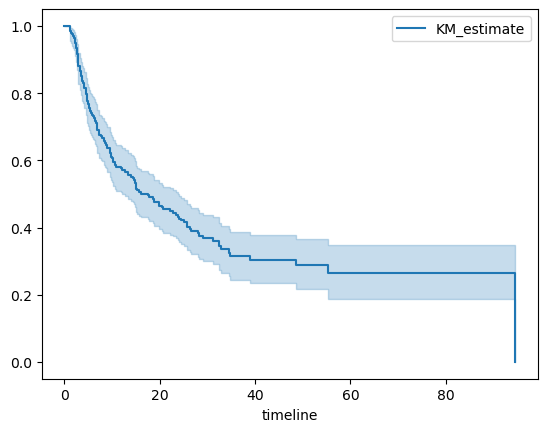

In [13]:
# plot the survival curve for the joint cohort
kmf.plot_survival_function()


103 rows for VanAllen
64 rows for Snyder
34 rows for Rizvi


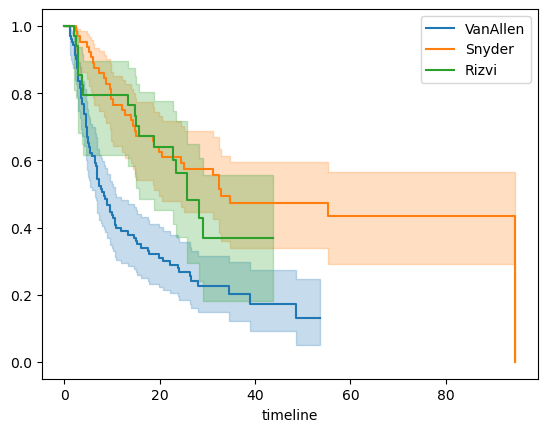

In [15]:
# plot survival curves for the three cohorts
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
ax = plt.subplot(111)
kmf_cohorts = KaplanMeierFitter()

for s in cohort_names:
    cohort_mask = df_survival.Cohort == s
    print("%d rows for %s" % (cohort_mask.sum(), s))
    df_survival_cohort = df_survival[cohort_mask]
    kmf_cohorts.fit(df_survival_cohort.Months, 
            event_observed=df_survival_cohort.Status, 
            label=s)
    
    kmf_cohorts.plot_survival_function(ax=ax)


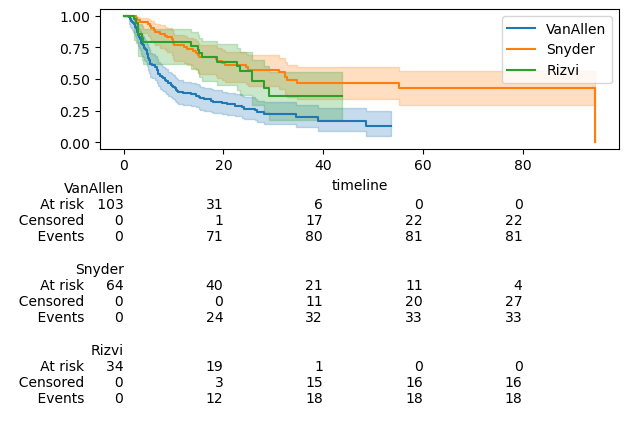

In [16]:
# plot survival curves with at-risk counts below 

import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
ax = plt.subplot(111)
kmfs = []

for s in cohort_names:
    cohort_mask = df_survival.Cohort == s
    df_survival_cohort = df_survival[cohort_mask]
    kmf = KaplanMeierFitter()

    kmf.fit(df_survival_cohort.Months, 
            event_observed=df_survival_cohort.Status, 
            label=s)
    kmf.plot_survival_function(ax=ax)
    kmfs.append(kmf)

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(*kmfs, ax=ax)
plt.tight_layout()
    

In [17]:
# are the VanAllen and Snyder curves different?

from lifelines.statistics import logrank_test

results = logrank_test(
    df_survival[df_survival.Cohort == "VanAllen"].Months,
    df_survival[df_survival.Cohort == "Snyder"].Months,
    event_observed_A=df_survival[df_survival.Cohort == "VanAllen"].Status, 
    event_observed_B=df_survival[df_survival.Cohort == "Snyder"].Status)

results.print_summary()
print(results.p_value)   

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          22.68 <0.005     18.99

1.918117635948352e-06


In [18]:
# count the neoantigen predictions per patient

neoags_per_patient = df_neoag.Sample.value_counts();
neoags_per_patient.name = "NeoAgCount"
neoags_per_patient

Pat110    3650
Pat138    3167
Pat38     2503
PR4092    2494
CR4880    1993
          ... 
Pat36        6
Pat18        5
NR3156       5
SD2051       4
NR6842       3
Name: NeoAgCount, Length: 205, dtype: int64

In [19]:
df_pred = df_survival.set_index("Sample").join([neoags_per_patient], how="inner");
df_pred

,Months,Status,Cohort,NeoAgCount
Pat02,53.654736,False,VanAllen,113
Pat03,3.287668,True,VanAllen,131
Pat04,32.449280,False,VanAllen,272
Pat06,5.293145,True,VanAllen,167
Pat08,4.602735,True,VanAllen,311
...,...,...,...,...
LO3793,6.800000,False,Rizvi,47
LO5004,22.700000,True,Rizvi,28
GR0134,21.900000,False,Rizvi,19
NI9507,27.900000,False,Rizvi,38


In [20]:
# remember that 3 patients with survival data are missing from the neoantigen table

len(df_pred), len(df_survival)

(198, 201)

In [21]:
# if a patient is missing from the prediction set make their value 0
df_pred = df_survival.set_index("Sample").join([neoags_per_patient], how="left").fillna(0);
df_pred

,Months,Status,Cohort,NeoAgCount
Sample,,,,
Pat02,53.654736,False,VanAllen,113.0
Pat03,3.287668,True,VanAllen,131.0
Pat04,32.449280,False,VanAllen,272.0
Pat06,5.293145,True,VanAllen,167.0
Pat08,4.602735,True,VanAllen,311.0
...,...,...,...,...
GR0134,21.900000,False,Rizvi,19.0
VA1330,23.400000,True,Rizvi,0.0
NI9507,27.900000,False,Rizvi,38.0


In [23]:
# what's the median neoag count?
df_pred.NeoAgCount.median()

154.0

logrank p-value = 0.017792


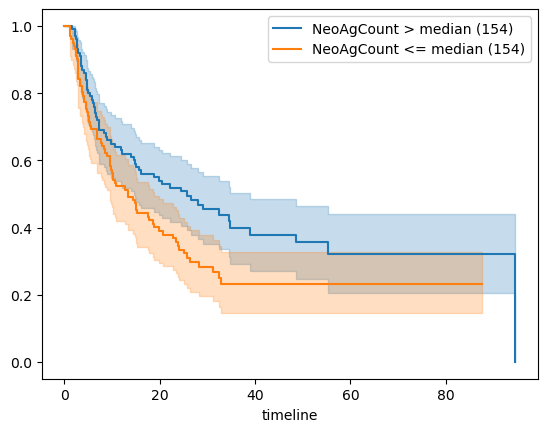

In [24]:
# plot survival curves for patients with above and below median neoAg predictions


ax = plt.subplot(111)
kmf = KaplanMeierFitter()

threshold = df_pred.NeoAgCount.median()
mask = df_pred.NeoAgCount > threshold

df_yes = df_pred[mask]
df_no = df_pred[~mask]

kmf.fit(
    df_yes.Months, 
    event_observed=df_yes.Status,
    label="NeoAgCount > median (%d)" % threshold)
    
kmf.plot_survival_function(ax=ax)

kmf.fit(
    df_no.Months, 
    event_observed=df_no.Status,
    label="NeoAgCount <= median (%d)" % threshold)
    
kmf.plot_survival_function(ax=ax)



results = logrank_test(
    df_yes.Months, 
    df_no.Months,
    event_observed_A=df_yes.Status, 
    event_observed_B=df_no.Status)


print("logrank p-value = %f" % results.p_value)   

In [26]:
from tqdm import tqdm
features = {}

print("Generating amino acid count features...")
for aa1 in tqdm("ACDEFGHIKLMNPQRSTVWY"):
    
    c1 = np.array([
        p.count(aa1) for p in df_neoag["MT.Peptide"]
    ])
    features["%s_count" % aa1] = c1
    for aa2 in "ACDEFGHIKLMNPQRSTVWY":
        c2 = np.array([
            p.count(aa2) for p in df_neoag["MT.Peptide"]
        ])
        features["max_%s_%s_count" % (aa1, aa2)] = np.maximum(c1, c2)
        features["sum_%s_%s_count" % (aa1, aa2)] = c1 + c2

affinities = df_neoag["MT.Score"]
print("Combining amino acid counts with IC50 thresholds")
for ic50 in tqdm([10, 100]):
    aff_mask = affinities <= ic50
    for feature_name, feature_values in list(features.items()):
        features[feature_name + "_ic50_lt_%d" % ic50] = feature_values * aff_mask
        
df_new_features = pd.DataFrame(features, index=df_neoag.index);
df_new_features


Generating amino acid count features...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.49it/s]


Combining amino acid counts with IC50 thresholds


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.31it/s]


,A_count,max_A_A_count,sum_A_A_count,max_A_C_count,sum_A_C_count,max_A_D_count,sum_A_D_count,max_A_E_count,sum_A_E_count,max_A_F_count,...,max_Y_S_count_ic50_lt_10_ic50_lt_100,sum_Y_S_count_ic50_lt_10_ic50_lt_100,max_Y_T_count_ic50_lt_10_ic50_lt_100,sum_Y_T_count_ic50_lt_10_ic50_lt_100,max_Y_V_count_ic50_lt_10_ic50_lt_100,sum_Y_V_count_ic50_lt_10_ic50_lt_100,max_Y_W_count_ic50_lt_10_ic50_lt_100,sum_Y_W_count_ic50_lt_10_ic50_lt_100,max_Y_Y_count_ic50_lt_10_ic50_lt_100,sum_Y_Y_count_ic50_lt_10_ic50_lt_100
0,1,1,2,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,2,2,0,...,0,0,0,0,1,1,0,0,0,0
4,1,1,2,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,1,1,2,1,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_neoag_extra = pd.concat([df_neoag, df_new_features], axis=1);
df_neoag_extra

,ID,MUTATION_ID,Sample,WT.Peptide,MT.Peptide,MT.Allele,WT.Score,MT.Score,HLA,Cohort,...,max_Y_S_count_ic50_lt_10_ic50_lt_100,sum_Y_S_count_ic50_lt_10_ic50_lt_100,max_Y_T_count_ic50_lt_10_ic50_lt_100,sum_Y_T_count_ic50_lt_10_ic50_lt_100,max_Y_V_count_ic50_lt_10_ic50_lt_100,sum_Y_V_count_ic50_lt_10_ic50_lt_100,max_Y_W_count_ic50_lt_10_ic50_lt_100,sum_Y_W_count_ic50_lt_10_ic50_lt_100,max_Y_Y_count_ic50_lt_10_ic50_lt_100,sum_Y_Y_count_ic50_lt_10_ic50_lt_100
0,1,1_1563747_C_T_Pat02,Pat02,NHREVAQIL,NYREVAQIL,C0702,701,70,"A0201,A2601,B0801,B0702,C0702,C0702",VanAllen,...,0,0,0,0,0,0,0,0,0,0
1,2,1_17087582_G_A_Pat02,Pat02,SPSNDFQVL,SPLNDFQVL,B0801,739,202,"A0201,A2601,B0801,B0702,C0702,C0702",VanAllen,...,0,0,0,0,0,0,0,0,0,0
2,3,1_17087582_G_A_Pat02,Pat02,SPSNDFQVL,SPLNDFQVL,B0702,32,37,"A0201,A2601,B0801,B0702,C0702,C0702",VanAllen,...,0,0,0,0,0,0,0,0,0,0
3,4,1_21806573_A_G_Pat02,Pat02,LLDEKEPEV,LLDEKGPEV,A0201,8,9,"A0201,A2601,B0801,B0702,C0702,C0702",VanAllen,...,0,0,0,0,1,1,0,0,0,0
4,5,1_46073697_C_T_Pat02,Pat02,KPGQEAPVL,KPGQEASVL,B0702,90,31,"A0201,A2601,B0801,B0702,C0702,C0702",VanAllen,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,4944,8_113697930_C_A_ZA6965,ZA6965,CLSNFTAPM,CLSNFTAPI,A3201,1850,71,"A0201,A3201,A0289,B400102,B450101,C0602,C0304",Rizvi,...,0,0,0,0,0,0,0,0,0,0
4944,4945,X_68749680_T_A_ZA6965,ZA6965,RLCVLVLML,RLSVLVLML,A0201,419,172,"A0201,A3201,A0289,B400102,B450101,C0602,C0304",Rizvi,...,0,0,0,0,0,0,0,0,0,0
4945,4946,X_68749680_T_A_ZA6965,ZA6965,RLCVLVLML,RLSVLVLML,A3201,516,314,"A0201,A3201,A0289,B400102,B450101,C0602,C0304",Rizvi,...,0,0,0,0,0,0,0,0,0,0
4946,4947,X_68749680_T_A_ZA6965,ZA6965,SRIRLCVLV,SRIRLSVLV,C0602,751,146,"A0201,A3201,A0289,B400102,B450101,C0602,C0304",Rizvi,...,0,0,0,0,0,0,0,0,0,0


In [205]:
best_p_value = 1.0
best_df_survival_yes = None
best_df_survival_no = None
best_feature_name = None
best_feature_threshold = None
best_count_median = None


for feature_name, feature_values in tqdm(features.items()):
    unique_values = np.unique(feature_values)
    if len(unique_values) > 1:
        thresholds = unique_values[:-1]
        for t in thresholds:
            feature_mask = feature_values > t
            n_rows = feature_mask.sum()
            if n_rows < 10:
                continue
            df_neoag_yes = df_neoag[feature_mask]
            
            neoags_per_patient = df_neoag_yes.Sample.value_counts();
            
            neoags_per_patient.name = "FilteredNeoAgCount"
            n_patients = len(neoags_per_patient)
            if n_patients < 10: 
                continue
        

            # if a patient is missing from the prediction set make their value 0
            df_pred = df_survival.set_index("Sample").join([neoags_per_patient], how="left").fillna(0);
            
            median_count = df_pred.FilteredNeoAgCount.median()
            survival_mask = df_pred.FilteredNeoAgCount > median_count
            
            df_yes = df_pred[survival_mask]
            df_no = df_pred[~survival_mask]
            
            results = logrank_test(
                df_yes.Months, 
                df_no.Months,
                event_observed_A=df_yes.Status, 
                event_observed_B=df_no.Status)

            p_value = results.p_value
            
            if p_value < best_p_value:
                
                print("%s > %d (%d rows, %d non-zero patients)" % (
                    feature_name, 
                    t, 
                    n_rows, 
                    n_patients))

                print("logrank p-value = %f" % results.p_value)   
                best_p_value = p_value
                best_df_survival_yes = df_yes.copy()
                best_df_survival_no = df_no.copy()
                
                best_feature_name = feature_name
                best_feature_threshold = t
                best_count_median = median_count

  0%|                                                                                                                                                                     | 2/3280 [00:00<02:46, 19.66it/s]

A_count > 0 (28988 rows, 204 non-zero patients)
logrank p-value = 0.041963
A_count > 1 (7461 rows, 193 non-zero patients)
logrank p-value = 0.038658
max_A_C_count > 1 (8306 rows, 196 non-zero patients)
logrank p-value = 0.016006


  0%|▌                                                                                                                                                                   | 10/3280 [00:00<03:00, 18.11it/s]

sum_A_D_count > 1 (13490 rows, 200 non-zero patients)
logrank p-value = 0.006444
sum_A_E_count > 2 (5165 rows, 188 non-zero patients)
logrank p-value = 0.001989


  2%|██▋                                                                                                                                                                 | 53/3280 [00:02<02:15, 23.88it/s]

sum_C_E_count > 3 (199 rows, 80 non-zero patients)
logrank p-value = 0.001684


  2%|███▍                                                                                                                                                                | 69/3280 [00:03<02:07, 25.16it/s]

sum_C_N_count > 1 (5326 rows, 192 non-zero patients)
logrank p-value = 0.000911


  2%|████                                                                                                                                                                | 82/3280 [00:03<02:04, 25.76it/s]

sum_C_V_count > 1 (13545 rows, 196 non-zero patients)
logrank p-value = 0.000397


  4%|██████                                                                                                                                                             | 121/3280 [00:05<02:21, 22.34it/s]

sum_D_V_count > 2 (4276 rows, 183 non-zero patients)
logrank p-value = 0.000134


 54%|████████████████████████████████████████████████████████████████████████████████████████                                                                          | 1783/3280 [01:07<00:59, 25.12it/s]

sum_E_I_count_ic50_lt_100 > 2 (2181 rows, 165 non-zero patients)
logrank p-value = 0.000069


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3280/3280 [01:58<00:00, 27.59it/s]


<Axes: xlabel='timeline'>

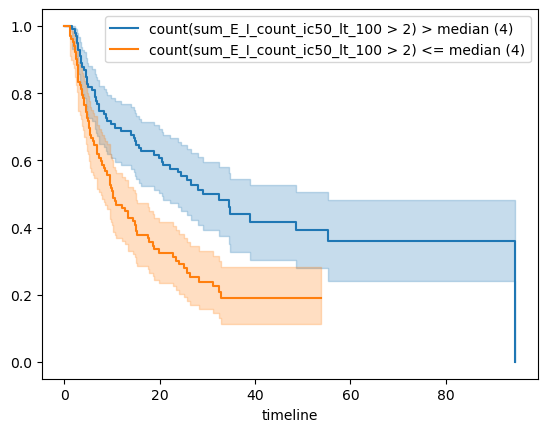

In [206]:
ax = plt.subplot(111)
kmf = KaplanMeierFitter()


kmf.fit(
    best_df_survival_yes.Months, 
    event_observed=best_df_survival_yes.Status,
    label="count(%s > %d) > median (%d)" % (best_feature_name, best_feature_threshold, best_count_median))
    
kmf.plot_survival_function(ax=ax)

kmf.fit(
    best_df_survival_no.Months, 
    event_observed=best_df_survival_no.Status,
    label="count(%s > %d) <= median (%d)" % (best_feature_name, best_feature_threshold, best_count_median))


kmf.plot_survival_function(ax=ax)


In [207]:
best_df_survival_yes["PatientHasFeatureAboveMedian"] = True
best_df_survival_no["PatientHasFeatureAboveMedian"] = False
best_df_survival = pd.concat([best_df_survival_yes, best_df_survival_no])



In [71]:
!pip install seaborn

/Users/iskander/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


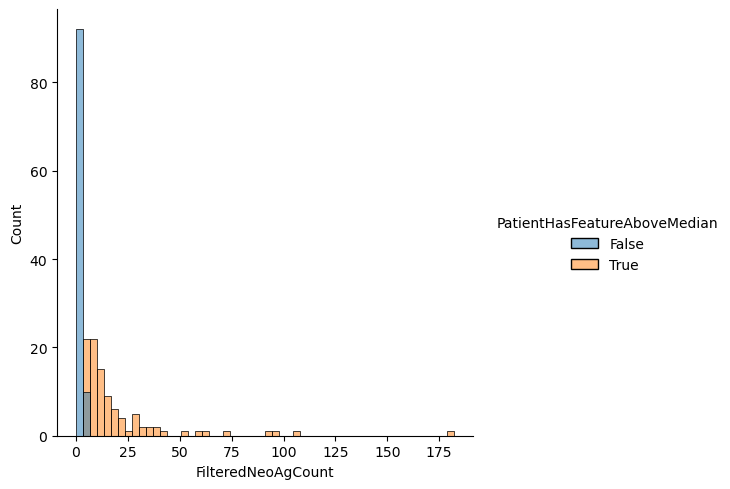

In [208]:
# look at the distribution of "low" vs "high" score groups
import seaborn as sns
sns.displot(data=best_df_survival, x="FilteredNeoAgCount", hue="PatientHasFeatureAboveMedian")

In [209]:
known_at_1yr = (best_df_survival.Months >= 12) | best_df_survival.Status
known_at_18mo = (best_df_survival.Months >= 18) | best_df_survival.Status
known_at_2yr = (best_df_survival.Months >= 24) | best_df_survival.Status
known_at_3yr = (best_df_survival.Months >= 36) | best_df_survival.Status

survived_1yr = best_df_survival.Months >= 12
survived_18mo = best_df_survival.Months >= 18
survived_2yr = best_df_survival.Months >= 24
survived_3yr = best_df_survival.Months >= 36

died_before_1yr = best_df_survival.Status & (best_df_survival.Months < 12)
died_before_18mo = best_df_survival.Status & (best_df_survival.Months < 18)
died_before_2yr = best_df_survival.Status & (best_df_survival.Months < 24)
died_before_3yr = best_df_survival.Status & (best_df_survival.Months < 36)


In [210]:
# correlation of score and survival at 1yrs 
np.corrcoef(survived_1yr[known_at_1yr], best_df_survival.FilteredNeoAgCount[known_at_1yr])

array([[1.        , 0.05802126],
       [0.05802126, 1.        ]])

In [211]:
# correlation of score and survival at 18mo 
np.corrcoef(survived_18mo[known_at_18mo], best_df_survival.FilteredNeoAgCount[known_at_18mo])

array([[1.        , 0.10930462],
       [0.10930462, 1.        ]])

In [212]:
# correlation of score and survival at 2yrs 
np.corrcoef(survived_2yr[known_at_2yr], best_df_survival.FilteredNeoAgCount[known_at_2yr])

array([[1.        , 0.11905313],
       [0.11905313, 1.        ]])

In [213]:
# correlation of score and survival at 3yrs 
np.corrcoef(survived_3yr[known_at_3yr], best_df_survival.FilteredNeoAgCount[known_at_3yr])

array([[1.        , 0.16956193],
       [0.16956193, 1.        ]])

In [81]:
!pip install scikit-learn

In [222]:
# extract out the feature as 2D NumPy array

X = best_df_survival.FilteredNeoAgCount.values[:, None]

# split the data into a training and testing dataset

# let's use 2yr survival as a trade-off between strong signal without losing most of the patients
known_mask = known_at_2yr
survival_mask = survived_2yr[known_mask]

train_mask = np.random.randn(known_mask.sum()) < 0
test_mask = ~train_mask

In [223]:
# also filter out rows where we don't know the status at 2yr

X_known = X[known_mask]
X_known_train = X_known[train_mask]
X_known_test = X_known[test_mask]

# using the median value from above for feature normalization and rescaling by dividing by 100 

X_train =  (X_known_train - 4) 
X_test =  (X_known_test - 4)
print("X_train = %s" % (X_train,))
print("X_test = %s" % (X_test,))


y_train = survival_mask[train_mask].values

print("y_train = %s" % (y_train,))
y_test = survival_mask[test_mask].values
print("y_test = %s" % (y_test,))
print("%d training samples (%0.2f%% survival), %d test samples (%0.2f%% survival)" % (
    len(X_train),
    y_train.mean() * 100,
    len(X_test),
    y_test.mean() * 100
))

X_train = [[  1.]
 [  3.]
 [ 10.]
 [178.]
 [ 12.]
 [  2.]
 [  2.]
 [ 68.]
 [  5.]
 [ 30.]
 [  1.]
 [  3.]
 [  4.]
 [  5.]
 [ 93.]
 [  6.]
 [ 23.]
 [ 15.]
 [ 26.]
 [  7.]
 [ 23.]
 [  3.]
 [  1.]
 [  7.]
 [  1.]
 [ 58.]
 [ 16.]
 [ 19.]
 [ 29.]
 [  7.]
 [  2.]
 [  7.]
 [  2.]
 [ 13.]
 [ 38.]
 [  6.]
 [  7.]
 [ 36.]
 [  3.]
 [ 11.]
 [  3.]
 [  2.]
 [ 16.]
 [ 36.]
 [  9.]
 [ 25.]
 [  3.]
 [  1.]
 [ 18.]
 [  4.]
 [ 11.]
 [  3.]
 [  3.]
 [ -4.]
 [ -1.]
 [ -4.]
 [  0.]
 [ -4.]
 [ -3.]
 [  0.]
 [ -3.]
 [ -4.]
 [ -4.]
 [  0.]
 [ -3.]
 [ -4.]
 [ -4.]
 [ -4.]
 [ -4.]
 [ -4.]
 [ -4.]
 [ -3.]
 [ -2.]
 [ -4.]
 [ -2.]
 [ -1.]
 [ -2.]
 [ -3.]
 [ -2.]
 [ -3.]
 [ -4.]
 [ -4.]
 [  0.]
 [ -4.]
 [ -4.]
 [ -3.]
 [  0.]
 [ -3.]
 [ -4.]
 [ -2.]
 [ -2.]
 [ -3.]
 [ -3.]
 [ -4.]
 [ -1.]
 [ -4.]
 [ -3.]]
X_test = [[  6.]
 [ 12.]
 [ 13.]
 [ 12.]
 [102.]
 [ 28.]
 [  2.]
 [  4.]
 [ 54.]
 [  2.]
 [  7.]
 [ 10.]
 [  2.]
 [  8.]
 [ 30.]
 [  1.]
 [  1.]
 [  8.]
 [ 17.]
 [  3.]
 [  3.]
 [  3.]
 [  9.]
 [  2.]
 [ 21.]
 [  

In [224]:
# let's fit a logistic regression on 3yr survival using just the feature we picked
import sklearn.linear_model

lr = sklearn.linear_model.LogisticRegression(penalty=None, fit_intercept=False)
lr.fit(X_test, y_test)
print("coef = ", lr.coef_)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print("y_train=%s" % (y_train,))
print("y_train_pred=%s" % (y_train_pred,))

print("y_test=%s" % (y_test,))
print("y_test_pred=%s" % (y_test_pred,))



coef =  [[0.00921825]]
y_train=[ True  True False False  True  True False False False  True  True False
 False False  True False False False False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False  True False  True  True  True  True
  True False  True  True  True  True False False False False False False
 False  True False False False False  True  True False False  True False
 False False False False  True  True  True  True  True False False False
 False False  True  True False False False False False False False False
 False]
y_train_pred=[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False

p-value = 0.015294


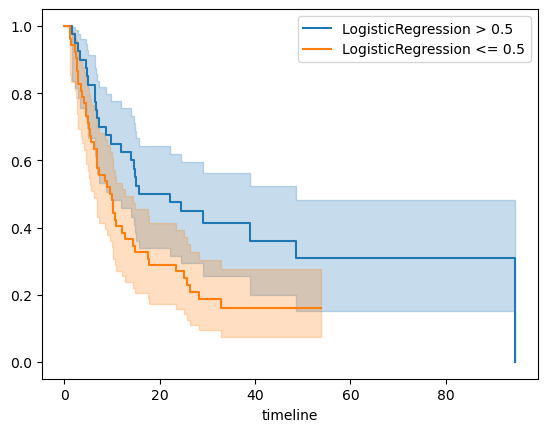

In [226]:
ax = plt.subplot(111)
kmf = KaplanMeierFitter()


best_df_known = best_df_survival[known_mask]

df_yes = best_df_known[test_mask][y_test_pred]
df_no = best_df_known[test_mask][~y_test_pred]

kmf.fit(
    df_yes.Months, 
    event_observed=df_yes.Status,
    label="LogisticRegression > 0.5")
    
kmf.plot_survival_function(ax=ax)

kmf.fit(
    df_no.Months, 
    event_observed=df_no.Status,
    label="LogisticRegression <= 0.5")

kmf.plot_survival_function(ax=ax)



results = logrank_test(
    df_yes.Months, 
    df_no.Months,
    event_observed_A=df_yes.Status, 
    event_observed_B=df_no.Status)


print("p-value = %f" % (results.p_value,))